In [21]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

### Look into the unqiue barcodes in TCR data

In [44]:
raw_file_folder = "GSE125881_RAW"
all_barcodes = set()
for file in os.listdir(raw_file_folder):
    if file.endswith(".csv.gz"):
        df = pd.read_csv(os.path.join(raw_file_folder, file), compression="gzip", sep=",")
        all_barcodes.update(df["barcodes"].str.split(";").explode().unique())
all_unique_tcr_barcodes = set([code[-1] for code in all_barcodes])

print(f"There are total of {len(all_barcodes)} unique barcodes across the TCR-seq data")
print(f"There are {len(all_unique_tcr_barcodes)} unique TCR barcodes across the TCR-seq data: {all_unique_tcr_barcodes}")

There are total of 51310 unique barcodes across the TCR-seq data
There are 1 unique TCR barcodes across the TCR-seq data: {'1'}


### Look into the unique barcodes in the expression data

In [49]:
# First trim expr file so it is more manageable
! head -100 GSE125881_raw.expMatrix.csv > first_100_lines_expMatrix.csv

expr_mat = pd.read_csv("first_100_lines_expMatrix.csv", index_col=0)
all_unique_expr_barcodes = set([c.split("-")[-1] for c in expr_mat.columns])
print(f"There are {len(expr_mat.columns)} cells in the dataset")
print(f"There are {len(all_unique_expr_barcodes)} unique barcodes across the sc-RNAseq data: {all_unique_expr_barcodes}")

There are 62167 cells in the dataset
There are 16 unique barcodes across the sc-RNAseq data: {'9', '1', '4', '3', '10', '13', '12', '6', '16', '5', '8', '14', '15', '7', '11', '2'}


### Look at distribution of barcode idx in expression data

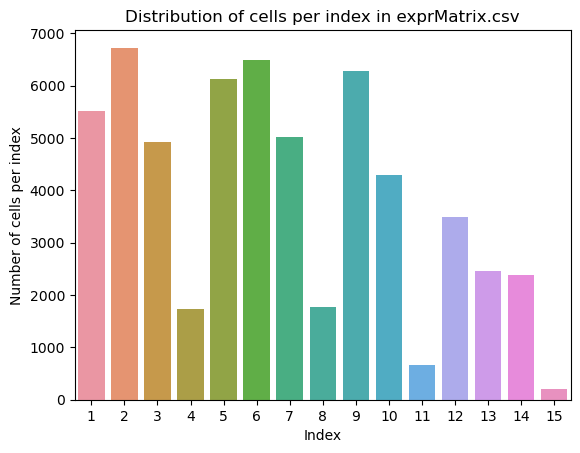

In [41]:
num_cells_per_idx = {}
for i in range(1,16):
    num_cells_per_idx[i] = len([c for c in expr_mat.columns if c.split("-")[-1] == str(i)])

sns.barplot(x=list(num_cells_per_idx.keys()), y=list(num_cells_per_idx.values()))
plt.xlabel("Index")
plt.ylabel("Number of cells per index")
plt.title("Distribution of cells per index in exprMatrix.csv")
plt.show()